In [38]:
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.utils import shuffle
from sklearn import metrics

In [39]:
X = pd.read_csv('./train.csv')
test = pd.read_csv('./test.csv')

In [40]:
X['PassengerId'].nunique()
#Entirely Unique so we'll remove it 
X.drop('PassengerId', axis=1, inplace=True)

There are 891 passengers in the data, 549 survived and 342 perished


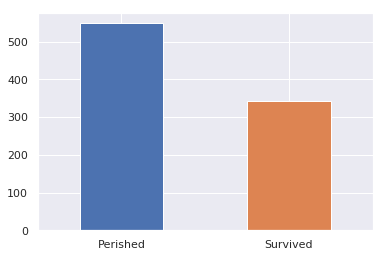

In [41]:
X['Survived'].value_counts().plot(kind='bar')

plt.xticks([0,1], ['Perished', 'Survived'],  rotation='horizontal')

print 'There are {} passengers in the data, {} survived and {} perished'.format(X['Survived'].count(), X['Survived'].value_counts()[0], X['Survived'].value_counts()[1])

There are 3 classes of passenger: 1st, 2nd and 3rd.
There are 216 in 1st class, 184 in 2nd class and 491 in 3rd class


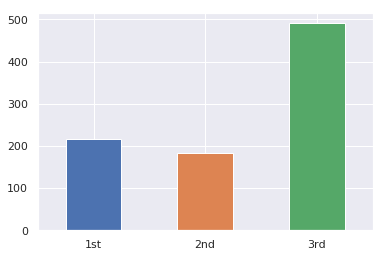

In [42]:
X['Pclass'].value_counts().sort_index().plot(kind='bar')

plt.xticks([0, 1, 2], ['1st', '2nd', '3rd' ],  rotation='horizontal')

print'There are 3 classes of passenger: 1st, 2nd and 3rd.\nThere are {} in 1st class, {} in 2nd class and {} in 3rd class'.format( X['Pclass'].value_counts()[1], X['Pclass'].value_counts()[2], X['Pclass'].value_counts()[3])

There are 577 men and 314 women 


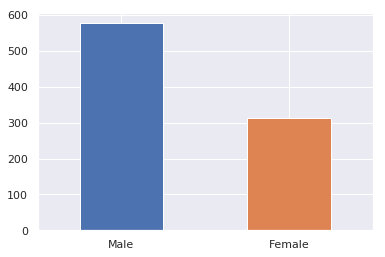

In [43]:
X.loc[:,'Sex'].replace({'male':1, 'female':0},inplace=True)

X['Sex'].value_counts().plot(kind='bar')

plt.xticks([0, 1], ['Male', 'Female'],  rotation='horizontal')

print'There are {} men and {} women '.format( X['Sex'].value_counts()[1], X['Sex'].value_counts()[0])

The ages range between 0.42 and 80.0 years old.
The mean, median and mode are 29.6991176471, 28.0 and 24.0, the data shows a positive skew.
Of 891 values there are 177 null values


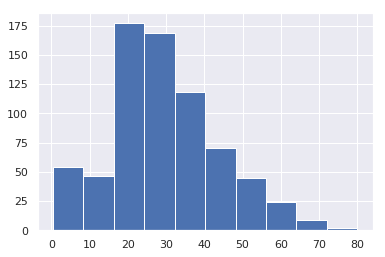

In [44]:
X['Age'].hist()

Ages = X['Age'].describe()

print'The ages range between {} and {} years old.\nThe mean, median and mode are {}, {} and {}, the data shows a positive skew.\nOf {} values there are {} null values'.format(
    Ages['min'], Ages['max'], Ages['mean'], X['Age'].median(), X['Age'].mode()[0], 891, X['Age'].isnull().sum()
)

In [45]:
X['Family'] = X['SibSp'] + X['Parch']

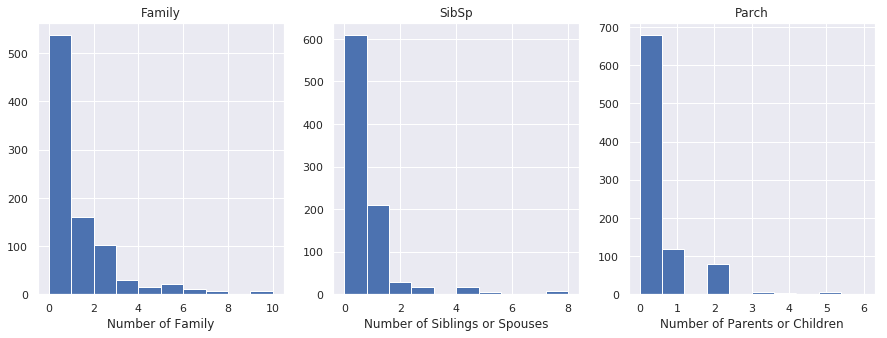

Family: The number of family members brought aboard is between 0 and 10, the mean is 0.904601571268

Sibsp: The  number of siblings and spouses brought aboard is between 0 and 8, the mean is 0.523007856341

Parch: The range of parents and children brought aboard is between 0 and 6, the mean is 0.381593714927



In [46]:
fig, axarr = plt.subplots(1, 3, figsize = (15, 5))
fig.subplots_adjust(left=None, bottom=None, right=None, top=None, wspace=0.2, hspace=0.5)
plots = ['Family', 'SibSp', 'Parch']
desc = ['Family', 'Siblings or Spouses', 'Parents or Children']
for i in range(3):
    plt.sca(axarr[i])
    plt.hist(X[plots[i]])
    plt.title(plots[i])
    plt.xlabel('Number of {}'.format(desc[i]))
 
plt.show()   
print 'Family: The number of family members brought aboard is between 0 and {}, the mean is {}\n'.format(X['Family'].max(), X['Family'].mean())
print 'Sibsp: The  number of siblings and spouses brought aboard is between 0 and {}, the mean is {}\n'.format(X['SibSp'].max(), X['SibSp'].mean())
print 'Parch: The range of parents and children brought aboard is between 0 and {}, the mean is {}\n'.format(X['Parch'].max(), X['Parch'].mean())

In [47]:
X['Ticket'].value_counts()

CA. 2343             7
347082               7
1601                 7
347088               6
CA 2144              6
3101295              6
382652               5
S.O.C. 14879         5
PC 17757             4
4133                 4
LINE                 4
349909               4
347077               4
W./C. 6608           4
113760               4
2666                 4
113781               4
19950                4
17421                4
347742               3
239853               3
110152               3
24160                3
13502                3
PC 17572             3
C.A. 34651           3
248727               3
35273                3
F.C.C. 13529         3
PC 17755             3
                    ..
330877               1
315094               1
236852               1
4137                 1
4136                 1
226593               1
4134                 1
374746               1
110813               1
C.A. 6212            1
349219               1
34218                1
343120     

In [48]:
X.loc[X['Ticket'].str.contains('[a-zA-Z]'), 'Ticket']

0               A/5 21171
1                PC 17599
2        STON/O2. 3101282
10                PP 9549
12              A/5. 2151
30               PC 17601
31               PC 17569
33             C.A. 24579
34               PC 17604
37             A./5. 2152
43          SC/Paris 2123
45        S.C./A.4. 23567
51             A/4. 39886
52               PC 17572
56             C.A. 31026
58             C.A. 34651
59                CA 2144
64               PC 17605
66             C.A. 29395
67              S.P. 3464
70             C.A. 33111
71                CA 2144
72           S.O.C. 14879
84             SO/C 14885
86             W./C. 6608
87        SOTON/OQ 392086
92            W.E.P. 5734
93              C.A. 2315
96               PC 17754
97               PC 17759
              ...        
744     STON/O 2. 3101288
745             WE/P 5735
746             C.A. 2673
761      SOTON/O2 3101272
772           S.O./P.P. 3
783            W./C. 6607
784    SOTON/O.Q. 3101312
788         

In [49]:
X.loc[X['Ticket'].str.contains('[a-zA-Z]'), 'Ticket'].value_counts().sort_index(ascending=True)

A./5. 2152           1
A./5. 3235           1
A.5. 11206           1
A.5. 18509           1
A/4 45380            1
A/4 48871            2
A/4. 20589           1
A/4. 34244           1
A/4. 39886           1
A/5 21171            1
A/5 21172            1
A/5 21173            1
A/5 21174            1
A/5 2466             1
A/5 2817             1
A/5 3536             1
A/5 3540             1
A/5 3594             1
A/5 3902             1
A/5. 10482           1
A/5. 13032           1
A/5. 2151            1
A/5. 3336            2
A/5. 3337            1
A/5. 851             1
A/S 2816             1
A4. 54510            1
C 17369              1
C 4001               1
C 7075               1
                    ..
SOTON/OQ 392082      1
SOTON/OQ 392086      1
SOTON/OQ 392089      1
SOTON/OQ 392090      1
STON/O 2. 3101269    1
STON/O 2. 3101273    1
STON/O 2. 3101274    1
STON/O 2. 3101275    1
STON/O 2. 3101280    1
STON/O 2. 3101285    1
STON/O 2. 3101286    1
STON/O 2. 3101288    1
STON/O 2. 3

In [50]:
X['Ticket'] = X['Ticket'].str.split()

X['TicketNum'] = X['Ticket'].apply(lambda x: x[-1])

X.loc[X['TicketNum'] == 'LINE', 'TicketNum'] = 0 #Some entries have no ticket number or fare, because they're crew members

X['TicketNum'] = X.loc[:,'TicketNum'].astype(float)

In [51]:
def ticket_clean(x):
    if len(x) == 1:
        x = 'NoPrefix'
        return x
    else:
        del x[-1]
        x= ''.join(x)
        return x
    
X['Ticket'] = X['Ticket'].apply(ticket_clean)

In [52]:
X.loc[X['Ticket'].str.contains('[a-zA-Z]'), 'Ticket'].value_counts()

NoPrefix      665
PC             60
C.A.           27
STON/O2.       18
A/5            10
W./C.           9
CA.             8
SOTON/O.Q.      8
A/5.            7
SOTON/OQ        7
CA              6
F.C.C.          5
C               5
S.O.C.          5
SC/PARIS        5
SC/Paris        4
S.O./P.P.       3
A/4.            3
PP              3
A/4             3
P/PP            2
S.C./PARIS      2
SC/AH           2
WE/P            2
SOTON/O2        2
A.5.            2
A./5.           2
SCO/W           1
W.E.P.          1
SC              1
S.C./A.4.       1
SO/C            1
Fa              1
A/S             1
S.P.            1
F.C.            1
S.W./PP         1
SW/PP           1
SC/AHBasle      1
A4.             1
S.O.P.          1
C.A./SOTON      1
W/C             1
Name: Ticket, dtype: int64

In [53]:
X['Ticket'] = X['Ticket'].apply(lambda x: x.split('.')).apply(lambda x: ''.join(x)).sort_values()

X.loc[X['Ticket'].str.contains('[a-zA-Z]'), 'Ticket'].value_counts()

NoPrefix      665
PC             60
CA             41
A/5            19
STON/O2        18
SOTON/OQ       15
W/C            10
SC/PARIS        7
A/4             6
C               5
SOC             5
FCC             5
SC/Paris        4
SO/PP           3
PP              3
SOTON/O2        2
P/PP            2
SC/AH           2
WE/P            2
A5              2
SW/PP           2
Fa              1
FC              1
SC/AHBasle      1
CA/SOTON        1
SC/A4           1
SO/C            1
A4              1
SOP             1
SC              1
SP              1
WEP             1
A/S             1
SCO/W           1
Name: Ticket, dtype: int64

In [54]:
prefixes = ['SCO/', 'A4|A5', 'WEP', 'SP', 'SC', 'SOP', 'SO/', 'SC/', 'CA|CA/', 'FC', 'SW/', '/PP|PP/', '/P|P/', 'WE/', 'SOTON/', 'STON/', 'PC']

for item in prefixes:
    X.loc[X['Ticket'].str.contains(item, case=False), 'Ticket'] = item

A = ['A4', 'A5']
X['Ticket'] = X['Ticket'].apply(lambda x: x.split('/')).apply(lambda x: ''.join(x)).sort_values()
X['Ticket'] = X['Ticket'].apply(lambda x: x.split('|')).apply(lambda x: ''.join(x)).sort_values()

for item in A:
    X.loc[X['Ticket'].str.contains(item, case=False), 'Ticket'] = item

others = ['SOP', 'SP', 'AS', 'WEP', 'Fa', 'SW', 'SO', 'SOC', 'FC', 'C', 'PP']
X.loc[X['Ticket'] == 'CACA', 'Ticket'] = 'CA'
X.loc[X['Ticket'] == 'A5', 'Ticket'] = 'A'
X.loc[X['Ticket'] == 'A4', 'Ticket'] = 'A'

for item in others:
    X.loc[X['Ticket'] == item, 'Ticket'] = 'other'

In [55]:
X['Ticket'].value_counts()

NoPrefix    665
PC           60
CA           42
other        34
A            29
STON         18
SOTON        17
SC           16
WC           10
Name: Ticket, dtype: int64

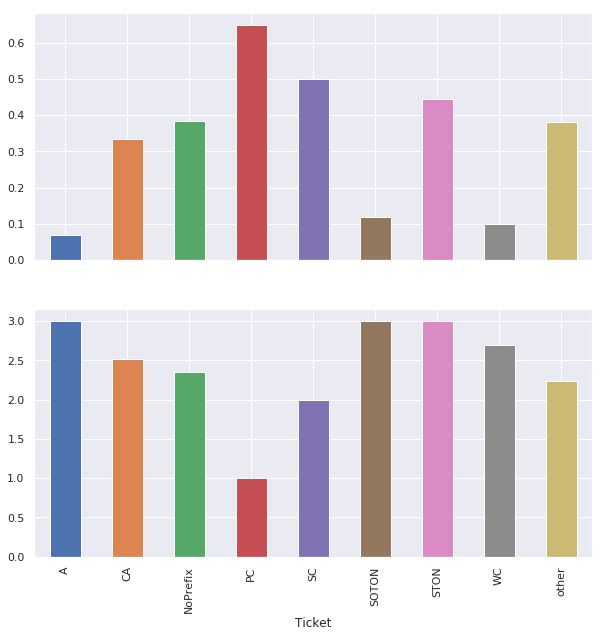

In [56]:
fig, axarr = plt.subplots(2,1, figsize = (10,10))
plots = ['Survived', 'Pclass']
for i in range(2):
    plt.sca(axarr[i])
    X.groupby('Ticket')[plots[i]].mean().plot(kind='bar',sharex=True)
    X.groupby('Ticket')[plots[i]].mean().plot(kind='bar')


In [57]:
X.drop('Cabin',axis=1, inplace=True)

tick_dummies = pd.get_dummies(X['Ticket'])

X = pd.concat([X.drop('Ticket',axis=1), tick_dummies], axis=1)

In [58]:
def convert_names(df):
    if 'Name' in df:
        split_names = df['Name'].str.split(',')
        titles = split_names.apply(lambda x: x[1]).str.strip().str.split('.').apply(lambda x: x[0])
        df['Title'] = titles
        mens_titles = ['Jonkheer', 'Sir', 'Capt', 'Col', 'Don', 'Dr', 'Rev', 'Major', 'Master']
        mrs_titles = ['Mme']
        miss_titles = ['Ms', 'Lady', 'Mlle', 'the Countess']
        
        for title in mens_titles:
            df.loc[df['Title'] == title, 'Title'] = 'Mr'
        
        for title in miss_titles :
            df.loc[df['Title'] == title, 'Title'] = 'Miss'
            
        for title in mrs_titles:
            df.loc[df['Title'] == title, 'Title'] = 'Mrs'
            
    df = df.drop(['Name'], axis = 1)
    return df

def encode_titles(df):
    encoded_titles = pd.get_dummies(df['Title'])
    df = pd.concat([df, encoded_titles], axis=1)
    df = df.drop(['Title'], axis = 1)
    return df

X = convert_names(X)

Text(0,0.5,'Percent Surived')

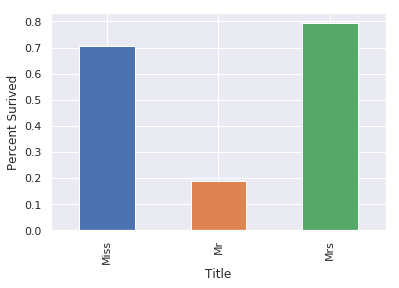

In [59]:
X.groupby('Title')['Survived'].mean().plot(kind='bar')
plt.ylabel('Percent Surived')

In [60]:
X = encode_titles(X)

In [61]:
X['Embarked'].value_counts(dropna=False)

S      644
C      168
Q       77
NaN      2
Name: Embarked, dtype: int64

In [62]:
X[X['Embarked'].isnull()]

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Family,TicketNum,...,NoPrefix,PC,SC,SOTON,STON,WC,other,Miss,Mr,Mrs
61,1,1,0,38.0,0,0,80.0,NaN,0,113572.0,...,1,0,0,0,0,0,0,1,0,0
829,1,1,0,62.0,0,0,80.0,NaN,0,113572.0,...,1,0,0,0,0,0,0,0,0,1


In [63]:
X.set_index('TicketNum').sort_index()[113000:115000]
#Can't find out embarked based on TicketNum but both of the missing values have the same ticketnum

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Family,A,...,NoPrefix,PC,SC,SOTON,STON,WC,other,Miss,Mr,Mrs
TicketNum,,,,,,,,,,,,,,,,,,,,,
113028.0,0,1,1,NaN,0,0,26.5500,S,0,0,...,1,0,0,0,0,0,0,0,1,0
113043.0,0,1,1,45.50,0,0,28.5000,S,0,0,...,1,0,0,0,0,0,0,0,1,0
113050.0,0,1,1,45.00,0,0,26.5500,S,0,0,...,1,0,0,0,0,0,0,0,1,0
113051.0,0,1,1,30.00,0,0,27.7500,C,0,0,...,1,0,0,0,0,0,0,0,1,0
113055.0,1,1,1,51.00,0,0,26.5500,S,0,0,...,1,0,0,0,0,0,0,0,1,0
113056.0,0,1,1,NaN,0,0,26.0000,S,0,0,...,1,0,0,0,0,0,0,0,1,0
113059.0,0,1,1,28.00,0,0,47.1000,S,0,0,...,1,0,0,0,0,0,0,0,1,0
113501.0,0,1,1,29.00,0,0,30.0000,S,0,0,...,1,0,0,0,0,0,0,0,1,0
113503.0,0,1,1,27.00,0,2,211.5000,C,2,0,...,1,0,0,0,0,0,0,0,1,0


In [64]:
#S is the mode so we'll impute using that 
X.loc[X['Embarked'].isnull(),'Embarked'] = 'S'

In [65]:
encoded_embarked = pd.get_dummies(X['Embarked'])
X = pd.concat([X, encoded_embarked], axis=1)
X.drop('Embarked', axis = 1, inplace = True)

In [66]:
X.corr()['Age'].sort_values()

Pclass      -0.369226
SibSp       -0.308247
Family      -0.301914
Miss        -0.271367
Parch       -0.189119
TicketNum   -0.107355
Survived    -0.077221
CA          -0.069666
SC          -0.046476
NoPrefix    -0.027854
S           -0.023233
Q           -0.022405
SOTON       -0.022058
STON        -0.021901
WC          -0.004792
A           -0.004142
other        0.025720
C            0.036261
Sex          0.093254
Fare         0.096067
Mr           0.097200
PC           0.140281
Mrs          0.178069
Age          1.000000
Name: Age, dtype: float64

Passenger class and title correlates relatively strongly with age so we'll develop a way to use both

In [67]:
for Title in ['Mr','Mrs', 'Miss']:
    display(X.groupby(['Pclass', Title])['Age'].median())

Pclass  Mr
1       0     35.0
        1     41.0
2       0     28.0
        1     30.0
3       0     21.5
        1     25.0
Name: Age, dtype: float64

Pclass  Mrs
1       0      36.0
        1      40.0
2       0      28.0
        1      32.0
3       0      23.0
        1      31.0
Name: Age, dtype: float64

Pclass  Miss
1       0       40.0
        1       30.0
2       0       30.0
        1       24.0
3       0       26.0
        1       18.0
Name: Age, dtype: float64

In [68]:
for Title in ['Mr','Mrs', 'Miss']:
    for i in range(1,4):
        X.loc[X['Age'].isnull() & (X[Title] == 1) & (X['Pclass'] == i), 'Age'] = X.groupby(['Pclass', Title])['Age'].median()[i][1]

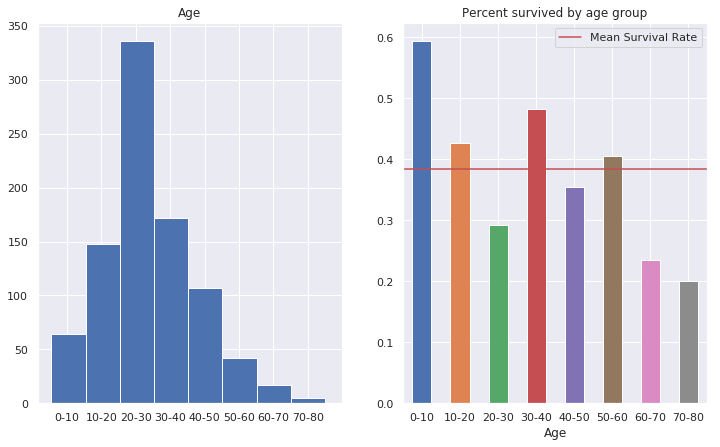

In [82]:
fig, axarr = plt.subplots(1,2, figsize =(12,7))
for i in range(0,2):
    plt.sca(axarr[i])
    if i == 0:
        X['Age'].hist(bins=8, label='Mean Survival Rate in age range')
        plt.title('Age')
        plt.xticks(np.arange(5,95,10), ['0-10', '10-20', '20-30', '30-40', '40-50', '50-60', '60-70', '70-80'], rotation='horizontal')
    else:
        try: #Strange error when trying to plot whilst using a categorical index used by pd.cut
            plt.plot(X.groupby(by = pd.cut(X['Age'], 8))['Survived'].mean().plot(kind = 'bar'))
        except: TypeError
        line = plt.axhline(y=X['Survived'].mean(), color = 'r', label='Mean Survival Rate')
        plt.title('Percent survived by age group')
        plt.xticks(np.arange(0,8,1), ['0-10', '10-20', '20-30', '30-40', '40-50', '50-60', '60-70', '70-80'], rotation='horizontal')
        plt.legend([line], ['Mean Survival Rate'])
        
    #ax.set(xlim=(0, 10), ylim=(-2, 2),
       #xlabel='x', ylabel='sin(x)',
       #title='A Simple Plot');

AttributeError: 'numpy.flatiter' object has no attribute 'shape'

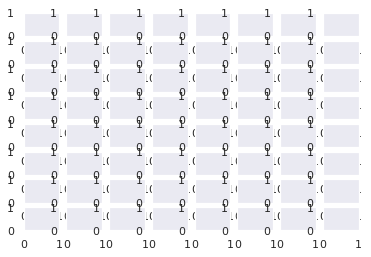

In [87]:
fig, axarr = plt.subplots(8,8)

axarr.flat.shape

There appears to be a higher than average survival rate among infants and a lower surivival rate among older travellers

In [33]:
def flag_age(df):
    df['Infant'] = df['Age'] <= 7 
    df['Old'] = df['Age'] >= 60
    return df

def build_model():
    model = Pipeline([
    ('scaler', StandardScaler()),
    ('logreg', LogisticRegression())
    ])

    gs = GridSearchCV(
        model,
        {'logreg__penalty': ['l1', 'l2'],
        'logreg__C': np.arange(0.3, 1.2, 0.3)},
        cv=5,
        n_jobs=4
    )
    return model, gs

In [34]:
X = flag_age(X)
Y = X.pop('Survived')
X_train, X_test, y_train, y_test = train_test_split(*shuffle(X, Y), test_size=0.3)

In [35]:
model, gs = build_model()
gs.fit(X_train, y_train)
gs.best_params_

{'logreg__C': 0.3, 'logreg__penalty': 'l2'}

In [36]:
prediction = gs.predict(X_test)

print 'Accuracy: %f' % metrics.accuracy_score(prediction, y_test)

Accuracy: 0.809701
